# Clustering Consulting Project 

A large technology firm needs your help, they've been hacked! Luckily their forensic engineers have grabbed valuable data about the hacks, including information like session time,locations, wpm typing speed, etc. The forensic engineer relates to you what she has been able to figure out so far, she has been able to grab meta data of each session that the hackers used to connect to their servers. These are the features of the data:

* 'Session_Connection_Time': How long the session lasted in minutes
* 'Bytes Transferred': Number of MB transferred during session
* 'Kali_Trace_Used': Indicates if the hacker was using Kali Linux
* 'Servers_Corrupted': Number of server corrupted during the attack
* 'Pages_Corrupted': Number of pages illegally accessed
* 'Location': Location attack came from (Probably useless because the hackers used VPNs)
* 'WPM_Typing_Speed': Their estimated typing speed based on session logs.


The technology firm has 3 potential hackers that perpetrated the attack. Their certain of the first two hackers but they aren't very sure if the third hacker was involved or not. They have requested your help! Can you help figure out whether or not the third suspect had anything to do with the attacks, or was it just two hackers? It's probably not possible to know for sure, but maybe what you've just learned about Clustering can help!

**One last key fact, the forensic engineer knows that the hackers trade off attacks. Meaning they should each have roughly the same amount of attacks. For example if there were 100 total attacks, then in a 2 hacker situation each should have about 50 hacks, in a three hacker situation each would have about 33 hacks. The engineer believes this is the key element to solving this, but doesn't know how to distinguish this unlabeled data into groups of hackers.**

## EDA with pandas and visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')
sns.set_palette('viridis')

In [2]:
eda = pd.read_csv('../datasets/hack_data.csv')
eda.head()

,Session_Connection_Time,Bytes Transferred,Kali_Trace_Used,Servers_Corrupted,Pages_Corrupted,Location,WPM_Typing_Speed
0,8.0,391.09,1,2.96,7.0,Slovenia,72.37
1,20.0,720.99,0,3.04,9.0,British Virgin Islands,69.08
2,31.0,356.32,1,3.71,8.0,Tokelau,70.58
3,2.0,228.08,1,2.48,8.0,Bolivia,70.80
4,20.0,408.50,0,3.57,8.0,Iraq,71.28


In [3]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Session_Connection_Time  334 non-null    float64
 1   Bytes Transferred        334 non-null    float64
 2   Kali_Trace_Used          334 non-null    int64  
 3   Servers_Corrupted        334 non-null    float64
 4   Pages_Corrupted          334 non-null    float64
 5   Location                 334 non-null    object 
 6   WPM_Typing_Speed         334 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 18.4+ KB


In [4]:
eda.describe()

,Session_Connection_Time,Bytes Transferred,Kali_Trace_Used,Servers_Corrupted,Pages_Corrupted,WPM_Typing_Speed
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,30.008982,607.245269,0.511976,5.258503,10.838323,57.342395
std,14.088201,286.335932,0.500607,2.301907,3.063526,13.411063
min,1.000000,10.000000,0.000000,1.000000,6.000000,40.000000
25%,18.000000,372.200000,0.000000,3.122500,8.000000,44.127500
50%,31.000000,601.650000,1.000000,5.285000,10.500000,57.840000
75%,42.000000,843.702500,1.000000,7.400000,14.000000,70.577500
max,60.000000,1330.500000,1.000000,10.000000,15.000000,75.000000


In [5]:
eda.isna().sum()

Session_Connection_Time    0
Bytes Transferred          0
Kali_Trace_Used            0
Servers_Corrupted          0
Pages_Corrupted            0
Location                   0
WPM_Typing_Speed           0
dtype: int64

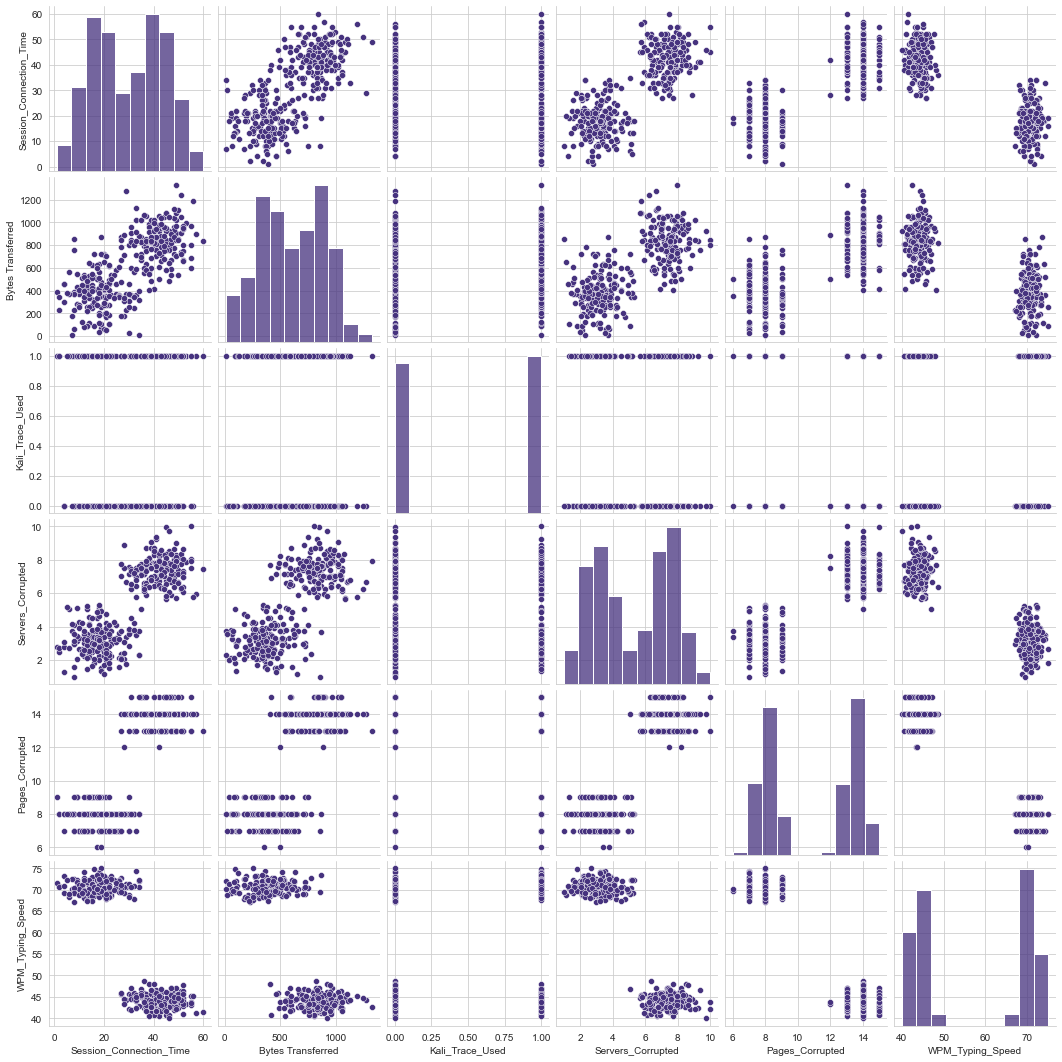

In [6]:
sns.pairplot(eda)

In [7]:
eda['Location'].value_counts()

United States Virgin Islands    6
Guinea-Bissau                   5
Czech Republic                  5
Mauritania                      5
Antigua and Barbuda             4
                               ..
Martinique                      1
Cape Verde                      1
Denmark                         1
Marshall Islands                1
Colombia                        1
Name: Location, Length: 181, dtype: int64

There's too many locations and the hackers could have used VPN. So this feature is useless.

In [8]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Session_Connection_Time  334 non-null    float64
 1   Bytes Transferred        334 non-null    float64
 2   Kali_Trace_Used          334 non-null    int64  
 3   Servers_Corrupted        334 non-null    float64
 4   Pages_Corrupted          334 non-null    float64
 5   Location                 334 non-null    object 
 6   WPM_Typing_Speed         334 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 18.4+ KB


<AxesSubplot:xlabel='Kali_Trace_Used', ylabel='count'>

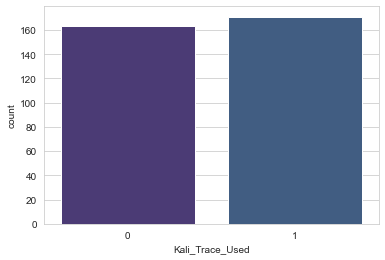

In [11]:
sns.countplot(x='Kali_Trace_Used', data=eda)

<AxesSubplot:xlabel='Pages_Corrupted', ylabel='count'>

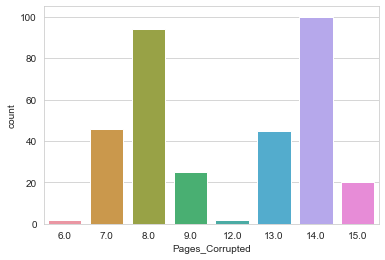

In [13]:
sns.countplot(x='Pages_Corrupted', data=eda)

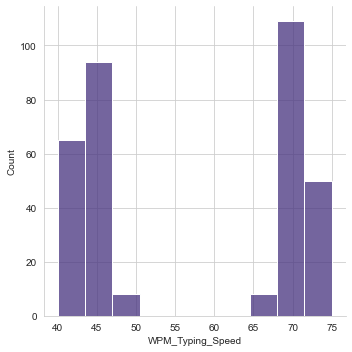

In [14]:
sns.displot(x='WPM_Typing_Speed', data=eda)

## Spark

In [16]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('hack').getOrCreate()

In [26]:
data = spark.read.csv('../datasets/hack_data.csv', inferSchema=True, header=True)

In [18]:
data.printSchema()

root
 |-- Session_Connection_Time: double (nullable = true)
 |-- Bytes Transferred: double (nullable = true)
 |-- Kali_Trace_Used: integer (nullable = true)
 |-- Servers_Corrupted: double (nullable = true)
 |-- Pages_Corrupted: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- WPM_Typing_Speed: double (nullable = true)



**Preprocess**

In [27]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml import Pipeline

In [22]:
assembler = VectorAssembler(inputCols=['Session_Connection_Time',
                                       'Bytes Transferred',
                                       'Kali_Trace_Used',
                                       'Servers_Corrupted',
                                       'Pages_Corrupted',
                                       'WPM_Typing_Speed'],
                            outputCol='features')

In [28]:
scaler = StandardScaler(inputCol='features', outputCol='scaledFeatures')

In [30]:
pipeline = Pipeline(stages=[assembler, scaler])

In [50]:
train, test = data.randomSplit([0.95, 0.05])
train.count(), test.count()

(323, 11)

In [51]:
final_train = pipeline.fit(train).transform(train)

In [52]:
final_train.printSchema()

root
 |-- Session_Connection_Time: double (nullable = true)
 |-- Bytes Transferred: double (nullable = true)
 |-- Kali_Trace_Used: integer (nullable = true)
 |-- Servers_Corrupted: double (nullable = true)
 |-- Pages_Corrupted: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- WPM_Typing_Speed: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- scaledFeatures: vector (nullable = true)



**KMeans cluster**

In [89]:
from pyspark.ml.clustering import KMeans
kmeans_2 = KMeans(featuresCol='scaledFeatures', k=2)
kmeans_3 = KMeans(featuresCol='scaledFeatures', k=3)

In [90]:
model_2 = kmeans_2.fit(final_train)
model_3 = kmeans_3.fit(final_train)

**Evaluate**

In [91]:
preds_2 = model_2.transform(final_train)
preds_2.select('prediction').show()

+----------+
|prediction|
+----------+
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
+----------+
only showing top 20 rows



In [92]:
preds_3 = model_3.transform(final_train)
preds_3.select('prediction').show()

+----------+
|prediction|
+----------+
|         0|
|         0|
|         2|
|         2|
|         2|
|         0|
|         0|
|         0|
|         0|
|         2|
|         2|
|         2|
|         2|
|         2|
|         0|
|         2|
|         0|
|         2|
|         2|
|         0|
+----------+
only showing top 20 rows



In [93]:
preds_2.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|  162|
|         0|  161|
+----------+-----+



In [75]:
preds_3.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|  162|
|         2|   82|
|         0|   79|
+----------+-----+



It's noted that the hackers' attacks are evenly matched (see bolded footnote), meaning that `preds_2` is correct. There are 2 hackers.

In [94]:
centers_2 = model_2.clusterCenters()
centers_2

[array([1.28214255, 1.31000614, 0.97988841, 1.38522107, 2.57182198,
        5.27384699]),
 array([3.02446348, 2.91512145, 1.03547514, 3.22440613, 4.52236986,
        3.29191672])]

## Visualize the result

In [101]:
preds_2.printSchema()

root
 |-- Session_Connection_Time: double (nullable = true)
 |-- Bytes Transferred: double (nullable = true)
 |-- Kali_Trace_Used: integer (nullable = true)
 |-- Servers_Corrupted: double (nullable = true)
 |-- Pages_Corrupted: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- WPM_Typing_Speed: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- scaledFeatures: vector (nullable = true)
 |-- prediction: integer (nullable = false)



In [107]:
hack_preds = preds_2.select(['Session_Connection_Time',
                             'Bytes Transferred',
                             'Kali_Trace_Used',
                             'Servers_Corrupted',
                             'Pages_Corrupted',
                             'Location',
                             'WPM_Typing_Speed',
                             'prediction'])

In [109]:
hack_preds.printSchema()

root
 |-- Session_Connection_Time: double (nullable = true)
 |-- Bytes Transferred: double (nullable = true)
 |-- Kali_Trace_Used: integer (nullable = true)
 |-- Servers_Corrupted: double (nullable = true)
 |-- Pages_Corrupted: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- WPM_Typing_Speed: double (nullable = true)
 |-- prediction: integer (nullable = false)



In [110]:
hack_preds.toPandas().to_csv('../datasets/hack-preds.csv')

In [113]:
df = pd.read_csv('../datasets/hack-preds.csv', index_col=0)
df.head()

,Session_Connection_Time,Bytes Transferred,Kali_Trace_Used,Servers_Corrupted,Pages_Corrupted,Location,WPM_Typing_Speed,prediction
0,1.0,390.69,1,2.79,9.0,Marshall Islands,71.57,0
1,2.0,343.10,1,2.74,8.0,Albania,70.64,0
2,4.0,295.79,0,2.75,8.0,Maldives,73.15,0
3,4.0,458.36,0,1.25,8.0,Czech Republic,70.80,0
4,4.0,459.64,0,3.09,7.0,Ecuador,69.27,0


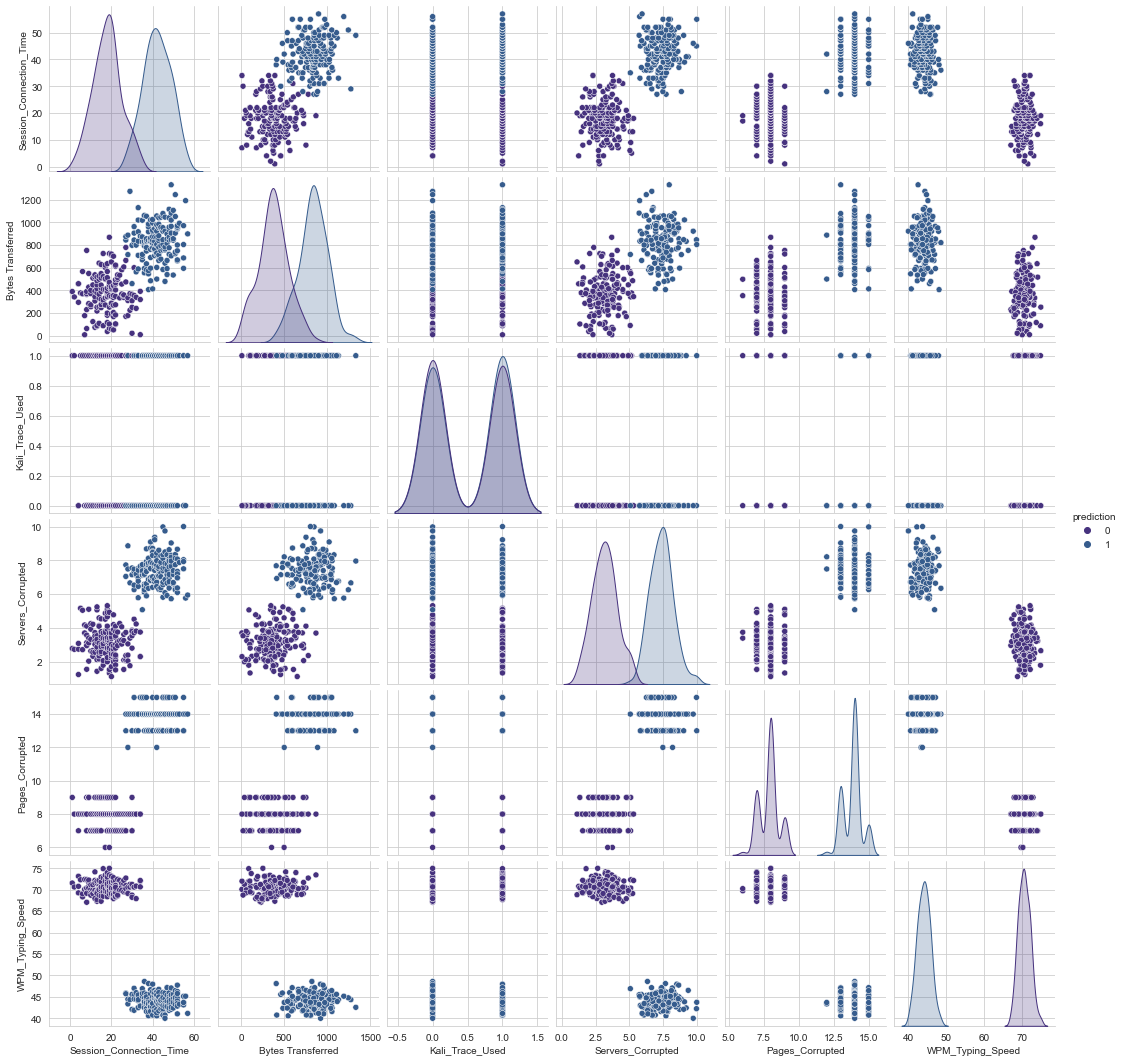

In [119]:
sns.pairplot(data=df, hue='prediction')

Each of these 2 hackers have distinct features. Let's see the visual of the initial statement that there could be 3 hackers

In [125]:
hack_preds_3 = preds_3.select(['Session_Connection_Time',
                             'Bytes Transferred',
                             'Kali_Trace_Used',
                             'Servers_Corrupted',
                             'Pages_Corrupted',
                             'Location',
                             'WPM_Typing_Speed',
                             'prediction'])

In [126]:
hack_preds_3.toPandas().to_csv('../datasets/hack-preds-3-clusters.csv')

In [128]:
df_3_cluster = pd.read_csv('../datasets/hack-preds-3-clusters.csv', index_col=0)
df_3_cluster.head()

,Session_Connection_Time,Bytes Transferred,Kali_Trace_Used,Servers_Corrupted,Pages_Corrupted,Location,WPM_Typing_Speed,prediction
0,1.0,390.69,1,2.79,9.0,Marshall Islands,71.57,0
1,2.0,343.10,1,2.74,8.0,Albania,70.64,0
2,4.0,295.79,0,2.75,8.0,Maldives,73.15,2
3,4.0,458.36,0,1.25,8.0,Czech Republic,70.80,2
4,4.0,459.64,0,3.09,7.0,Ecuador,69.27,2


D:\anaconda\envs\mlearning\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda\envs\mlearning\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


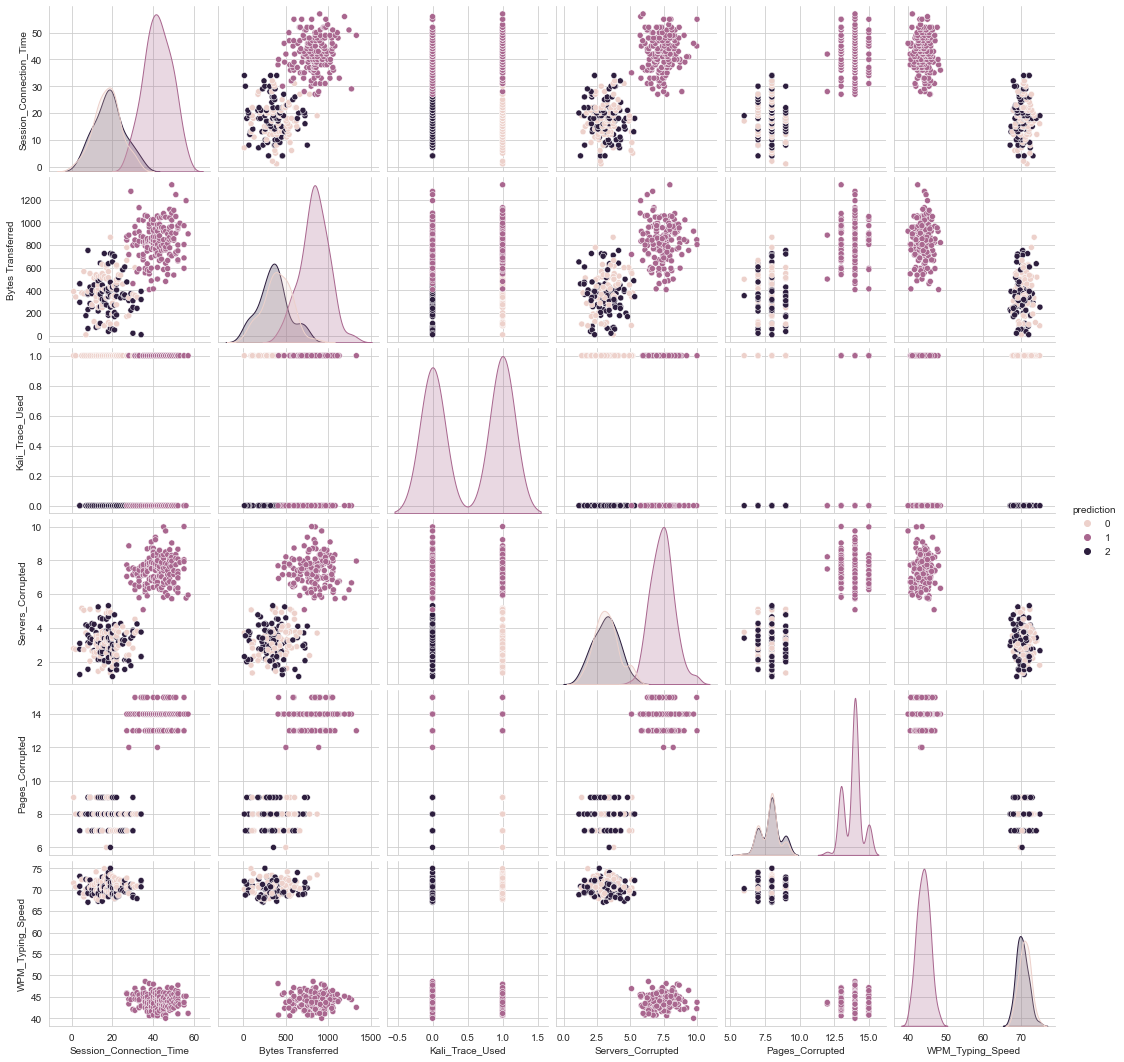

In [129]:
sns.pairplot(data=df_3_cluster, hue='prediction')

As you can see the 3rd class is basically merged into one of the 2 classes. And the code produced 0 variance warning.

## Brand new data

I have split the data earlier into train and test

In [130]:
test.show()

+-----------------------+-----------------+---------------+-----------------+---------------+-------------------+----------------+
|Session_Connection_Time|Bytes Transferred|Kali_Trace_Used|Servers_Corrupted|Pages_Corrupted|           Location|WPM_Typing_Speed|
+-----------------------+-----------------+---------------+-----------------+---------------+-------------------+----------------+
|                    2.0|           228.08|              1|             2.48|            8.0|            Bolivia|            70.8|
|                    8.0|           857.01|              0|              1.0|            7.0|     Western Sahara|           69.53|
|                   12.0|           424.83|              1|             2.53|            8.0|         Bangladesh|           69.99|
|                   12.0|            428.8|              1|             2.22|            7.0|              Congo|           72.65|
|                   23.0|           358.54|              1|             2.25|      

In [131]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml import Pipeline

In [132]:
final_test = pipeline.fit(test).transform(test)
final_test.printSchema()

root
 |-- Session_Connection_Time: double (nullable = true)
 |-- Bytes Transferred: double (nullable = true)
 |-- Kali_Trace_Used: integer (nullable = true)
 |-- Servers_Corrupted: double (nullable = true)
 |-- Pages_Corrupted: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- WPM_Typing_Speed: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- scaledFeatures: vector (nullable = true)



In [133]:
preds_test = model_2.transform(final_test)
preds_test.select('prediction').show()

+----------+
|prediction|
+----------+
|         0|
|         0|
|         0|
|         0|
|         0|
|         0|
|         1|
|         1|
|         1|
|         1|
|         1|
+----------+



In [134]:
hack_preds_test = preds_test.select(['Session_Connection_Time',
                             'Bytes Transferred',
                             'Kali_Trace_Used',
                             'Servers_Corrupted',
                             'Pages_Corrupted',
                             'Location',
                             'WPM_Typing_Speed',
                             'prediction'])

In [135]:
hack_preds_test.toPandas().to_csv('../datasets/hack-preds-test.csv')

In [136]:
df_test = pd.read_csv('../datasets/hack-preds-test.csv', index_col=0)
df_test.head()

,Session_Connection_Time,Bytes Transferred,Kali_Trace_Used,Servers_Corrupted,Pages_Corrupted,Location,WPM_Typing_Speed,prediction
0,2.0,228.08,1,2.48,8.0,Bolivia,70.80,0
1,8.0,857.01,0,1.00,7.0,Western Sahara,69.53,0
2,12.0,424.83,1,2.53,8.0,Bangladesh,69.99,0
3,12.0,428.80,1,2.22,7.0,Congo,72.65,0
4,23.0,358.54,1,2.25,8.0,Nauru,73.10,0


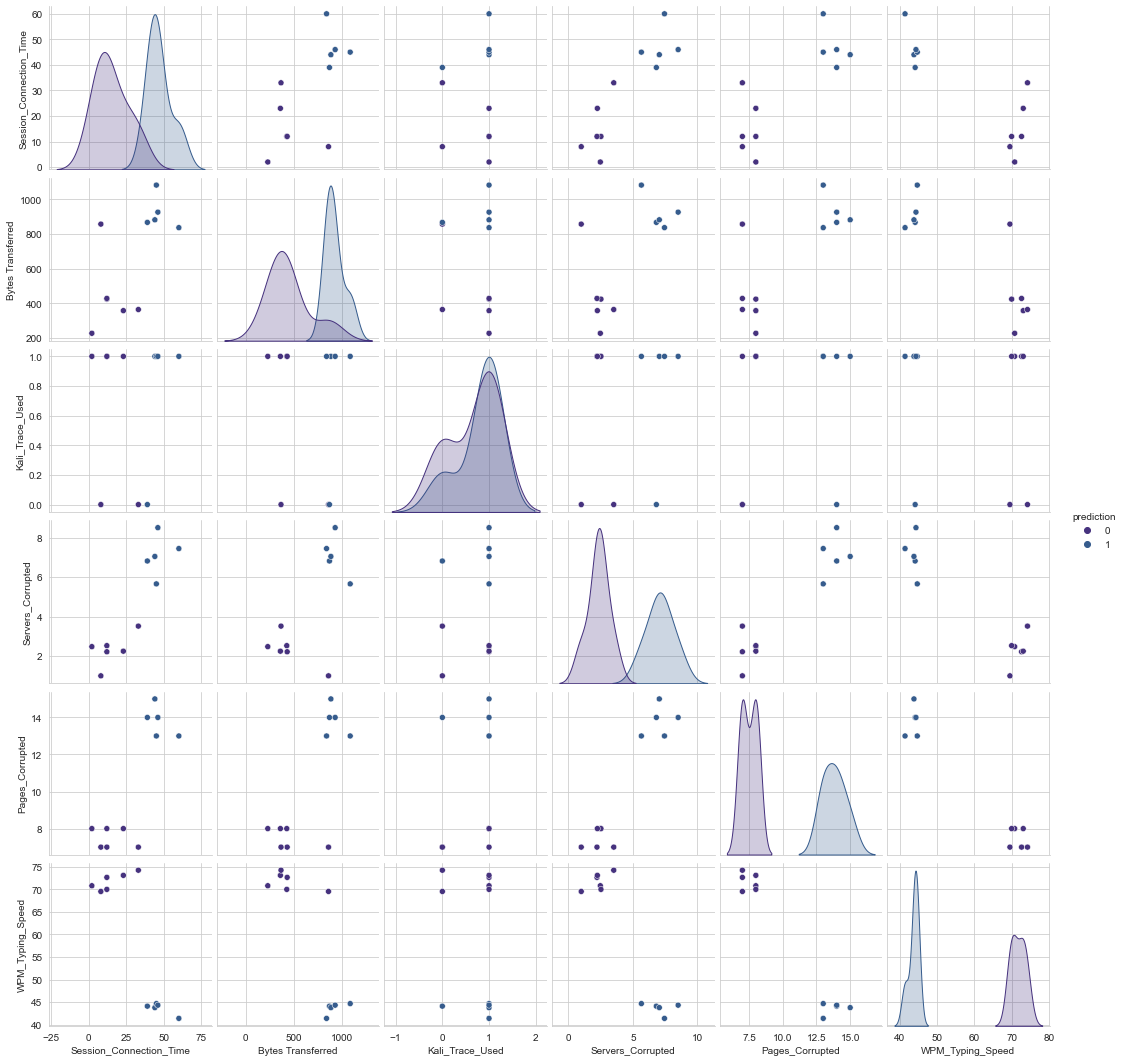

In [137]:
sns.pairplot(data=df_test, hue='prediction')